In [1]:
import numpy as np
from mechanoChemML.workflows.pde_solver.pde_utility import plot_PDE_solutions, plot_fields, split_data, expand_dataset, exe_cmd, BatchData, plot_one_field_hist, plot_one_field_stat, plot_one_field,plot_PDE_solutions_new


/opt/free/Tensorflow/tf-2.1/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
_inputs = np.load('inputs.npy')
_labels = np.load('labels.npy')
_mean = np.load('mean.npy')
_var = np.load('var.npy')
_std = np.load('std.npy')

dofs = 2
tot_img = 6
coef = 0.5 #5.0 #1.0 #0.5


In [4]:

DNS_data = _labels
new_dns_data = []
for i0 in range(0, np.shape(DNS_data)[0]):
        print('processing ... ', i0, ' total: ', np.shape(DNS_data)[0])
        one_dns_data = DNS_data[i0:i0+1, :,:,:]
        one_margin = np.ma.masked_where(one_dns_data >= 0.0, one_dns_data) # keep the margin
        one_margin = np.ma.filled(one_margin, 0.0)
        x_new = np.ma.masked_where(one_dns_data < 0.0, one_dns_data) # remove the margin
        # print('dns_data:', one_dns_data)
        # print('margin:', one_margin)
        # print('solution:', x_new)
        x_0 = 1.0/coef * (x_new - 0.5)
        x_new_new = x_0
        x_new_new = np.ma.filled(x_new_new, 0.0)
        #print('solution_new_new:', x_new_new)
        one_new_dns_data = x_new_new + one_margin  # have to fill the masked region with zeros, otherwise, it won't work.
        #print('one_new_dns_data:', one_new_dns_data)
        new_dns_data.append(one_new_dns_data)
new_labels = np.concatenate(new_dns_data, axis=0)
#print('new_labels', np.shape(new_labels))
#np.save('np-labels-rescaled.npy', new_labels)


processing ...  0  total:  5
processing ...  1  total:  5
processing ...  2  total:  5
processing ...  3  total:  5
processing ...  4  total:  5


In [ ]:

mean_data = _mean
new_mean_data = []
for i0 in range(0, np.shape(DNS_data)[0]):
        print('processing ... ', i0, ' total: ', np.shape(DNS_data)[0])
        one_dns_data = DNS_data[i0:i0+1, :,:,:]
        one_mean_data = mean_data[i0:i0+1, :,:,:] 
        one_margin = np.ma.masked_where(one_dns_data >= 0.0, one_dns_data) # keep the margin
        one_margin = np.ma.filled(one_margin, 0.0)
        x_new = np.ma.masked_where(one_dns_data < 0.0, one_mean_data) # remove the margin
        # print('dns_data:', one_dns_data)
        # print('margin:', one_margin)
        # print('solution:', x_new)
        x_0 = 1.0/coef * (x_new - 0.5)
        x_new_new = x_0
        x_new_new = np.ma.filled(x_new_new, 0.0)
        #print('solution_new_new:', x_new_new)
        one_new_mean_data = x_new_new + one_margin  # have to fill the masked region with zeros, otherwise, it won't work.
        #print('one_new_dns_data:', one_new_dns_data)
        new_mean_data.append(one_new_mean_data)
new_mean = np.concatenate(new_mean_data, axis=0)
#print('new_labels', np.shape(new_labels))
#np.save('np-labels-rescaled.npy', new_labels)

Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. Thus, the plot might not look so right.
Pred. Mean. is using label_min and label_max as colorbar range. 

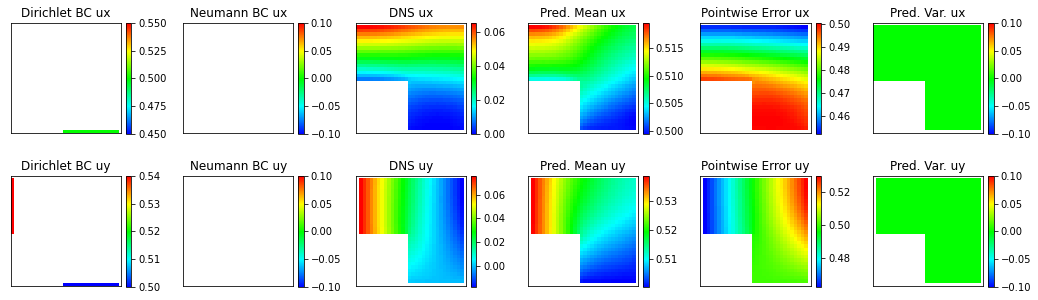

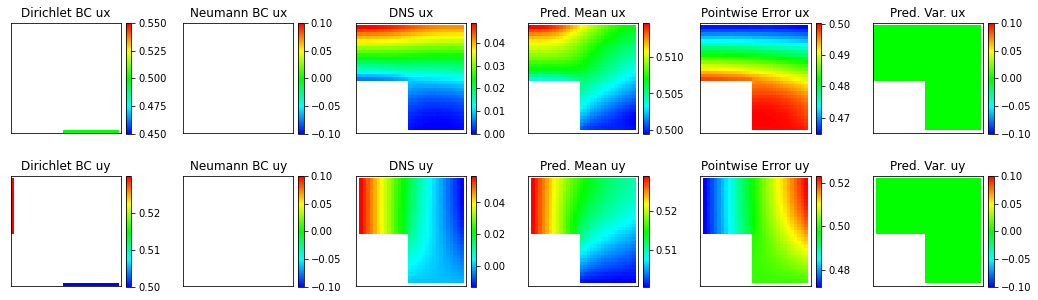

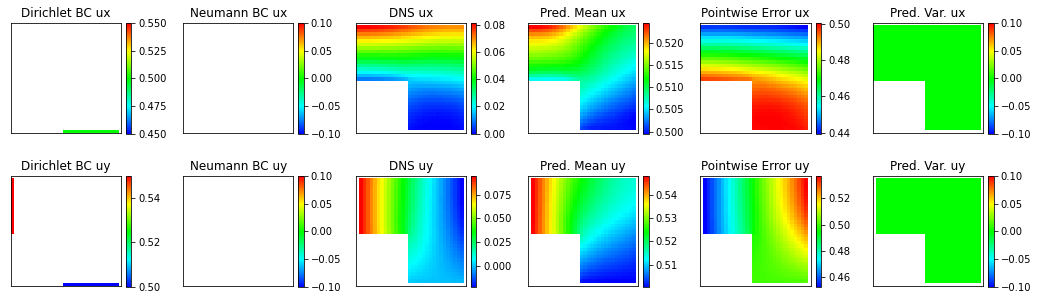

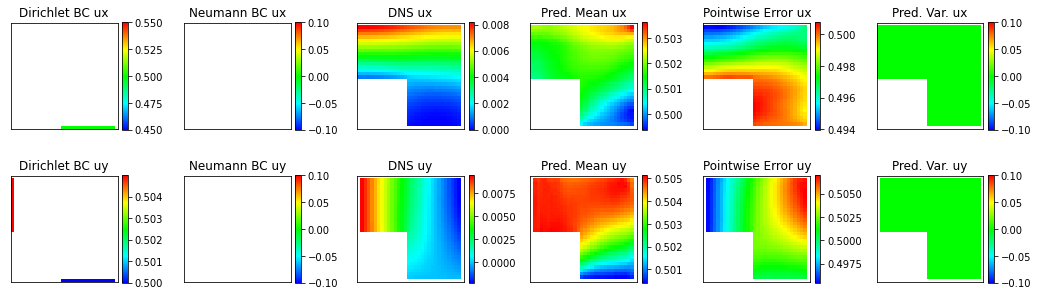

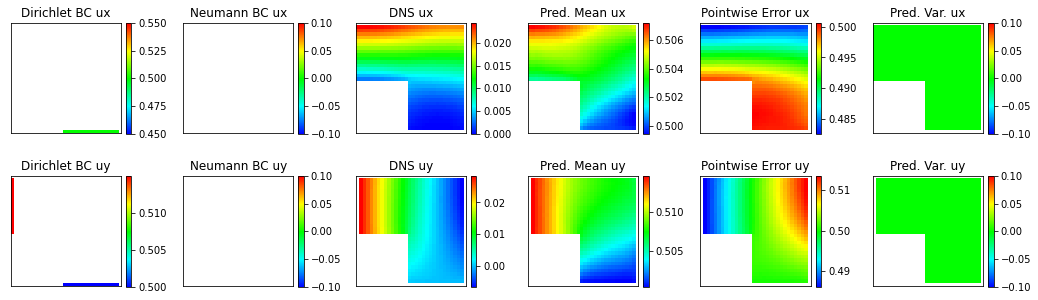

In [5]:

for i in range(0, np.shape(new_labels)[0]):
    plot_PDE_solutions(
        img_input = _inputs[i:i+1, :, :, 0:2*dofs], 
        img_label = new_labels[i:i+1, :, :, 0:dofs], 
        img_pre_mean = _mean[i:i+1, :, :, 0:dofs], 
        img_pre_var = _var[i:i+1, :, :, 0:dofs], 
        img_pre_std = _std[i:i+1, :, :, 0:dofs], 
        dof=dofs, 
        dof_name=['ux','uy'], 
        tot_img=tot_img, 
        filename = str(i)+'.png'
        )
